<a href="https://colab.research.google.com/github/kowshik27/GRIP-Task01/blob/main/GRIP_Task1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP MAY'21 INTERNSHIP TASK 1:

>The **objective** is to predict the percentage scored by students when number of hours studied by the student is provided


# **Simple Linear Regression ML model using scikit learn library**



> In this section, we are going to see the implementation of scikit learn regression functions for making predictions 




## Firstly, we've to import some Libraries

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

In [3]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
dataset = pd.read_csv(url, delimiter= ",")

In [4]:
# Head function displays the data, by default shows 5 rows
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# gives details about the numerical columns in dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Checking for any missing data in dataset
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [84]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data Visualization

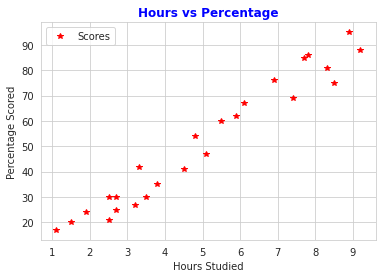

In [83]:
# plot for Hours vs Scores using plt
dataset.plot(x='Hours', y='Scores', style='*', color ="red")  
plt.title('Hours vs Percentage', fontdict= {'weight' : 'bold', 'color':'blue'} )
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

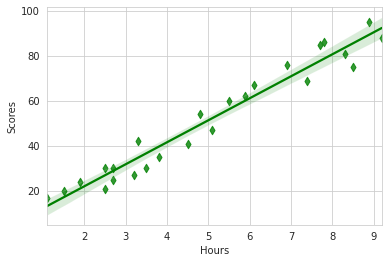

In [27]:
# plot for Hours vs Scores using sns

sns.set_style('whitegrid')
sns.regplot(x ='Hours', y ='Scores', data = dataset, marker = 'd', color = 'green')

In [9]:
# extracting feature(hrs) abd label(scores)
hours = dataset.iloc[:,0:1].values
scores = dataset.iloc[:,1].values
print(hours,'\n\n\n',scores)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] 


 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Now, we are spliting the data into train and test data

In [10]:
from sklearn.model_selection import train_test_split  
Xtrain, Xtest, ytrain, ytest = train_test_split(hours, scores, test_size=0.2, random_state =0)

## Training and Prediction 

In [69]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()          #Determining Model
lnr =linear_regression.fit(Xtrain,ytrain)             # Training Model
print(lnr)
ypred = linear_regression.predict(Xtest)          # model predictions for test data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [12]:
df = pd.DataFrame({'Actual %': ytest, 'Predicted %': ypred}) 
df

,Actual %,Predicted %
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## **What will be predicted score if a student studies for 9.25 hrs/ day?**

In [85]:
# Now lets test the learning model with 9.25 study hours/ with some other values
hrs = float(input('Please enter your number of study hours ') or 9.25)
yprd = linear_regression.predict([[hrs]])        # just making hrs to 2d vector
print('The predicted percentage scored for', hrs , 'hours of study is', round(yprd[0],5)) 

Please enter your number of study hours 9.25
The predicted percentage scored for 9.25 hours of study is 93.69173


Text(0, 0.5, 'Percentage Scored')

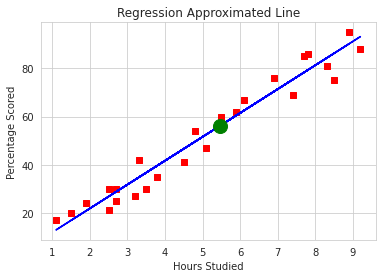

In [64]:
m = linear_regression.coef_
c = linear_regression.intercept_
line = m*hours+c       # line equation used by regression algorithm for predictions
X = hrs
y = round(yprd[0],3)


plt.scatter(hours,scores, color = 'red', marker = "s")
plt.plot(hours, line, color = 'blue')
plt.plot(X, y, color = 'green', marker = 'o', markersize='14')

plt.title('Regression Approximated Line')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored') 

## Accuracy of the Learning Model/ Model Evaluation



In [14]:
from sklearn.metrics import mean_absolute_error
MA_error = mean_absolute_error(ytest,ypred)
err = round(MA_error,4)
print('Mean absolute error',err)
# similarly
from sklearn.metrics import mean_squared_error
print('Mean Squared error', round(
    mean_squared_error(ytest,ypred,squared = True),4
))
print('Root Mean Squared(RMS) error', round(
    mean_squared_error(ytest,ypred,squared = False),4
))

Mean absolute error 4.1839
Mean Squared error 21.5988
Root Mean Squared(RMS) error 4.6474


## **Conclusion**
## If a student studies 9.25 hours/day, he may scores 93.69173±4.1839(approx).